In [1]:
import pandas as pd
from pycaret.datasets import get_data
from pycaret.classification import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('Back_Test_Result.csv')
dataset.shape

(1000, 10)

In [3]:
dataset.head()

,Candle_No,Current_Market_Fit,Current_Market,Current_Market_Stoploss,Rec1,Rec1_P,Rec2,Rec2_P,Rec3,Rec3_P
0,662.0,33.0,Bearish,0.0,4.0,BUY,3.0,BUY,80.0,BUY
1,5870.0,67.0,Bearish,0.0,75.0,BUY,29.0,SELL,11.0,SELL
2,4153.0,92.0,Bearish,0.0,22.0,BUY,3.0,SELL,0.0,BUY
3,158.0,33.0,Bearish,0.0,0.0,BUY,26.0,BUY,5.0,SELL
4,4013.0,0.0,Bullish,0.0,74.0,BUY,45.0,BUY,69.0,BUY


## Data Cleaning

In [4]:
#dataset = dataset.drop(dataset[dataset['Current_Market_Fit'] < 5.0].index)
#dataset = dataset.drop(dataset[dataset['Rec1'] < 20.0].index)
#dataset = dataset.drop(dataset[dataset['Rec2'] < 5.0].index)
#dataset = dataset.drop(dataset[dataset['Rec3'] < 1.0].index)
#dataset = dataset.reset_index(drop=True)
dataset.shape

(1000, 10)

In [5]:
dataset.head()

,Candle_No,Current_Market_Fit,Current_Market,Current_Market_Stoploss,Rec1,Rec1_P,Rec2,Rec2_P,Rec3,Rec3_P
0,662.0,33.0,Bearish,0.0,4.0,BUY,3.0,BUY,80.0,BUY
1,5870.0,67.0,Bearish,0.0,75.0,BUY,29.0,SELL,11.0,SELL
2,4153.0,92.0,Bearish,0.0,22.0,BUY,3.0,SELL,0.0,BUY
3,158.0,33.0,Bearish,0.0,0.0,BUY,26.0,BUY,5.0,SELL
4,4013.0,0.0,Bullish,0.0,74.0,BUY,45.0,BUY,69.0,BUY


## Feature Reduction

In [6]:
dataset = dataset.drop([
    'Candle_No',
    'Current_Market_Fit',
    'Current_Market_Stoploss',
#    'Rec1',
#    'Rec1_P',
#    'Rec2',
#    'Rec2_P',
#    'Rec3',
#    'Rec3_P'
], axis=1)

In [7]:
dataset.head()

,Current_Market,Rec1,Rec1_P,Rec2,Rec2_P,Rec3,Rec3_P
0,Bearish,4.0,BUY,3.0,BUY,80.0,BUY
1,Bearish,75.0,BUY,29.0,SELL,11.0,SELL
2,Bearish,22.0,BUY,3.0,SELL,0.0,BUY
3,Bearish,0.0,BUY,26.0,BUY,5.0,SELL
4,Bullish,74.0,BUY,45.0,BUY,69.0,BUY


## One-Hot Encoding

In [8]:
dataset['Current_Market'] = dataset['Current_Market'].replace(['Bullish','Bearish'],[1,0])
dataset['Rec1_P'] = dataset['Rec1_P'].replace(['BUY','SELL'],[1,0])
dataset['Rec2_P'] = dataset['Rec2_P'].replace(['BUY','SELL'],[1,0])
dataset['Rec3_P'] = dataset['Rec3_P'].replace(['BUY','SELL'],[1,0])

In [9]:
dataset.head()

,Current_Market,Rec1,Rec1_P,Rec2,Rec2_P,Rec3,Rec3_P
0,0,4.0,1,3.0,1,80.0,1
1,0,75.0,1,29.0,0,11.0,0
2,0,22.0,1,3.0,0,0.0,1
3,0,0.0,1,26.0,1,5.0,0
4,1,74.0,1,45.0,1,69.0,1


In [10]:
data = dataset.sample(frac=0.80, random_state=765).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (800, 7)
Unseen Data For Predictions: (200, 7)


In [11]:
exp_clf101 = setup(data = data, target = 'Current_Market', session_id=123, silent=True) 

,Description,Value
0,session_id,123
1,Target,Current_Market
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(800, 7)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [12]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5527,0.5611,0.5264,0.5524,0.5363,0.1051,0.1041,0.1260
ada,Ada Boost Classifier,0.5509,0.5649,0.5660,0.5530,0.5568,0.1023,0.1037,0.0180
et,Extra Trees Classifier,0.5421,0.5529,0.5515,0.5487,0.5487,0.0845,0.0845,0.0400
lightgbm,Light Gradient Boosting Machine,0.5419,0.5534,0.5266,0.5476,0.5352,0.0842,0.0844,0.0100
qda,Quadratic Discriminant Analysis,0.5402,0.5404,0.5590,0.5413,0.5484,0.0799,0.0808,0.1130
gbc,Gradient Boosting Classifier,0.5401,0.5712,0.5518,0.5461,0.5463,0.0808,0.0817,0.0130
rf,Random Forest Classifier,0.5259,0.5522,0.5409,0.5307,0.5347,0.0521,0.0518,0.0470
dt,Decision Tree Classifier,0.5152,0.5152,0.5122,0.5176,0.5123,0.0304,0.0309,0.1080
svm,SVM - Linear Kernel,0.4956,0.0000,0.4262,0.3890,0.3525,-0.0121,-0.0148,0.0050
lr,Logistic Regression,0.4901,0.4973,0.4915,0.4943,0.4906,-0.0190,-0.0192,0.2060


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [13]:
MODEL = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4821,0.5287,0.5000,0.4828,0.4912,-0.0357,-0.0357
1,0.5000,0.5619,0.4286,0.5000,0.4615,0.0000,0.0000
2,0.5536,0.5472,0.6429,0.5455,0.5902,0.1071,0.1089
3,0.5000,0.5587,0.5714,0.5000,0.5333,0.0000,0.0000
4,0.4464,0.4235,0.5357,0.4545,0.4918,-0.1071,-0.1089
5,0.5714,0.5727,0.6071,0.5667,0.5862,0.1429,0.1432
6,0.6786,0.7181,0.6071,0.7083,0.6538,0.3571,0.3608
7,0.6250,0.7028,0.6786,0.6129,0.6441,0.2500,0.2514
8,0.5714,0.5888,0.4828,0.6087,0.5385,0.1483,0.1518
9,0.4727,0.5093,0.4643,0.4815,0.4727,-0.0542,-0.0542


In [14]:
TUNED_MODEL = tune_model(MODEL)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6071,0.5855,0.5714,0.6154,0.5926,0.2143,0.2148
1,0.5536,0.5906,0.5357,0.5556,0.5455,0.1071,0.1072
2,0.4821,0.4847,0.5714,0.4848,0.5246,-0.0357,-0.0363
3,0.5179,0.5230,0.5714,0.5161,0.5424,0.0357,0.0359
4,0.5357,0.4783,0.5000,0.5385,0.5185,0.0714,0.0716
5,0.5357,0.5102,0.5357,0.5357,0.5357,0.0714,0.0714
6,0.7321,0.6811,0.6786,0.7600,0.7170,0.4643,0.4670
7,0.5893,0.6288,0.6071,0.5862,0.5965,0.1786,0.1787
8,0.5179,0.5875,0.4828,0.5385,0.5091,0.0382,0.0384
9,0.5091,0.5384,0.5000,0.5185,0.5091,0.0185,0.0185


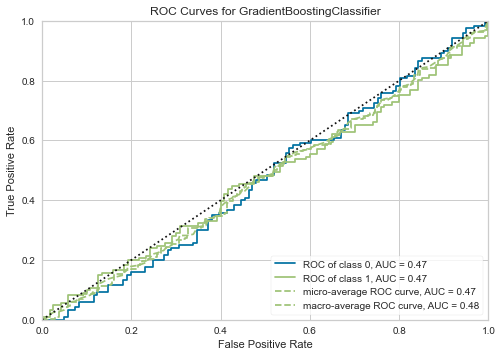

In [15]:
plot_model(TUNED_MODEL, plot = 'auc')

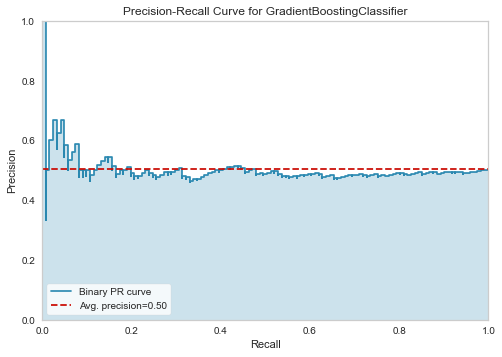

In [16]:
plot_model(TUNED_MODEL, plot = 'pr')

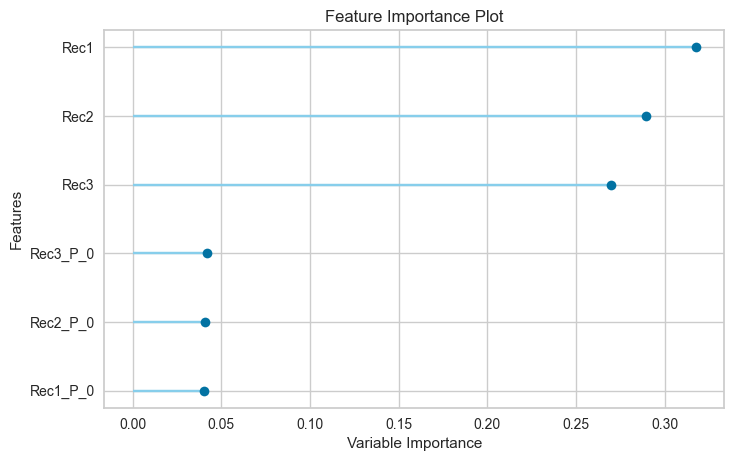

In [17]:
plot_model(TUNED_MODEL, plot='feature')

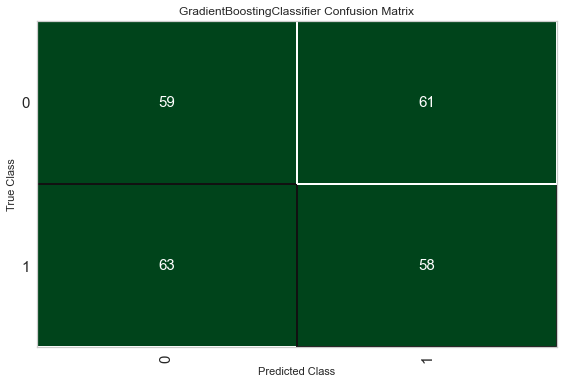

In [18]:
plot_model(TUNED_MODEL, plot = 'confusion_matrix')

In [19]:
predict_model(TUNED_MODEL);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.4855,0.4720,0.4793,0.4874,0.4833,-0.0290,-0.0290


In [20]:
FINAL_MODEL = finalize_model(TUNED_MODEL)

In [21]:
print(FINAL_MODEL)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=7,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [22]:
predict_model(FINAL_MODEL);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [23]:
unseen_predictions = predict_model(FINAL_MODEL, data=data_unseen)
unseen_predictions.head()

,Current_Market,Rec1,Rec1_P,Rec2,Rec2_P,Rec3,Rec3_P,Label,Score
0,1,50.0,0,76.0,0,36.0,0,1,0.9634
1,1,43.0,1,87.0,1,59.0,0,1,0.8996
2,0,82.0,0,73.0,1,0.0,1,0,0.9826
3,0,7.0,1,86.0,1,83.0,0,0,0.9468
4,0,83.0,0,68.0,1,63.0,0,0,0.9619


In [24]:
save_model(FINAL_MODEL,'Final Model 04Nov2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Current_Market',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nume...
                                             learning_rate=0.15, loss='deviance',
                                             max_depth=7, max_features=1.0,
                                             max_leaf_nodes=None,
           

In [25]:
SAVED_FINAL_MODEL = load_model('Final Model 04Nov2021')

Transformation Pipeline and Model Successfully Loaded


In [26]:
new_prediction = predict_model(SAVED_FINAL_MODEL, data=data_unseen)

In [27]:
new_prediction.head(20)

,Current_Market,Rec1,Rec1_P,Rec2,Rec2_P,Rec3,Rec3_P,Label,Score
0,1,50.0,0,76.0,0,36.0,0,1,0.9634
1,1,43.0,1,87.0,1,59.0,0,1,0.8996
2,0,82.0,0,73.0,1,0.0,1,0,0.9826
3,0,7.0,1,86.0,1,83.0,0,0,0.9468
4,0,83.0,0,68.0,1,63.0,0,0,0.9619
5,1,85.0,1,35.0,0,73.0,0,1,0.9122
6,1,23.0,1,38.0,1,53.0,0,1,0.9508
7,0,35.0,1,34.0,0,21.0,1,0,0.9137
8,0,81.0,1,82.0,1,39.0,0,0,0.8492
9,0,60.0,1,9.0,1,88.0,0,0,0.9834


In [28]:
final = new_prediction[['Current_Market','Label']]

In [29]:
final.head(30)

,Current_Market,Label
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0
5,1,1
6,1,1
7,0,0
8,0,0
9,0,0
